In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt

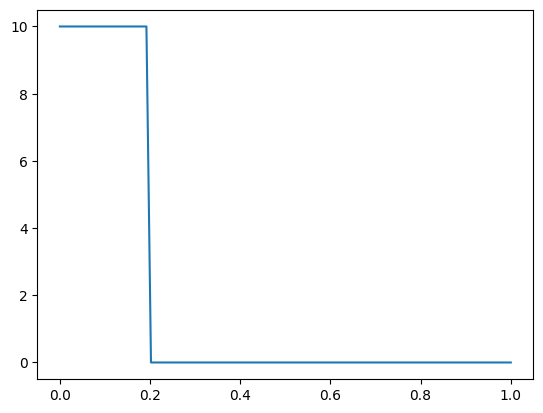

In [2]:
# Define the system

x = np.linspace(0,1.0,100)
dx = 1/100
dt = 0.000001
c = 2.0

init = 10*np.heaviside(x,1.0) - 10*np.heaviside(x-0.2,1.0)
plt.plot(x,init)

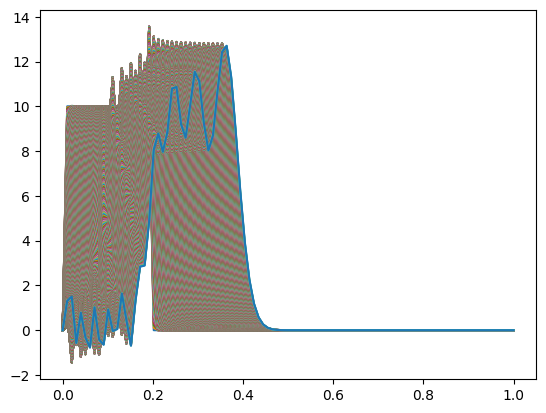

In [3]:
# Central differences, higher-order accuracy
# visualize amplitude + phase error

CD_sol = init*0 + init

fig,ax = plt.subplots()
for n in range(100000):

    k1 = CD_sol*0
    k1[1] = CD_sol[1] - (c*dt)/(2*dx)*(CD_sol[2]-CD_sol[0])
    k1[-2] = CD_sol[-2] - (c*dt)/(2*dx)*(CD_sol[-1]-CD_sol[-3])
    for j in range(2,len(CD_sol)-2):
        k1[j] = CD_sol[j] - (c*dt)/(24*dx)*(CD_sol[j-2] - 27*CD_sol[j-1] + 27*CD_sol[j+1] - CD_sol[j+2])
    k1[0] = 0
    k1[-1] = 0
    
    k2 = CD_sol*0
    k2[1] = CD_sol[1] - (c*dt/2)/(2*dx)*(k1[2]-k1[0])
    k2[-2] = CD_sol[-2] - (c*dt/2)/(2*dx)*(k1[-1]-k1[-3])
    for j in range(2,len(CD_sol)-2):
        k2[j] = CD_sol[j] - (c*dt/2)/(24*dx)*(k1[j-2] - 27*k1[j-1] + 27*k1[j+1] - k1[j+2])
    k2[0] = 0
    k2[-1] = 0

    k3 = CD_sol*0
    k3[1] = CD_sol[1] - (c*dt/2)/(2*dx)*(k2[2]-k2[0])
    k3[-2] = CD_sol[-2] - (c*dt/2)/(2*dx)*(k2[-1]-k2[-3])
    for j in range(2,len(CD_sol)-2):
        k3[j] = CD_sol[j] - (c*dt/2)/(24*dx)*(k2[j-2] - 27*k2[j-1] + 27*k2[j+1] - k2[j+2])
    k3[0] = 0
    k3[-1] = 0

    k4 = CD_sol*0
    k4[1] = CD_sol[1] - (c*dt)/(2*dx)*(k3[2]-k3[0])
    k4[-2] = CD_sol[-2] - (c*dt)/(2*dx)*(k3[-1]-k3[-3])
    for j in range(2,len(CD_sol)-2):
        k4[j] = CD_sol[j] - (c*dt)/(24*dx)*(k3[j-2] - 27*k3[j-1] + 27*k3[j+1] - k3[j+2])
    k4[0] = 0
    k4[-1] = 0

    for j in range(1,len(CD_sol)-1):
        CD_sol[j] = CD_sol[j] + (dt/6)*(k1[j] + 2*k2[j] + 2*k3[j] + k4[j])
    CD_sol[0] = 0
    CD_sol[-1] = 0

    CD_sol = k2

    if n % 100 == 0:
        ax.plot(x,CD_sol)
ax.plot(x,CD_sol)

In [51]:
# RK4

x = [2.0]
y = [0.25]
z = [1.0]
t = 0

def lorenz(t, x, y, z):
    dxdt = 10*(y-x)
    dydt = x*(28-z)-y
    dzdt = x*y - 8/3*z
    return dxdt, dydt, dzdt

def rk4(t,dt,x,y,z):
    f1, f2, f3 = lorenz(t,x,y,z)
    kx1 = dt*f1
    ky1 = dt*f2
    kz1 = dt*f3

    f1, f2, f3 = lorenz(t+0.5*dt,kx1,ky1,kz1)
    kx2 = dt*f1
    ky2 = dt*f2
    kz2 = dt*f3

    f1, f2, f3 = lorenz(t+0.5*dt,kx2,ky2,kz2)
    kx3 = dt*f1
    ky3 = dt*f2
    kz3 = dt*f3

    f1, f2, f3 = lorenz(t+dt,kx3,ky3,kz3)
    kx4 = dt*f1
    ky4 = dt*f2
    kz4 = dt*f3

    x,y,z = x + (1/6)*(kx1 + 2*kx2 + 2*kx3 + kx4), y + (1/6)*(ky1 + 2*ky2 + 2*ky3 + ky4), z + (1/6)*(kz1 + 2*kz2 + 2*kz3 + kz4)
    return x,y,z

dt = 0.00002
while t < 100:
    xtemp, ytemp, ztemp = rk4(t,dt,x[-1],y[-1],z[-1])
    x.append(xtemp)
    y.append(ytemp)
    z.append(ztemp)
    t += dt

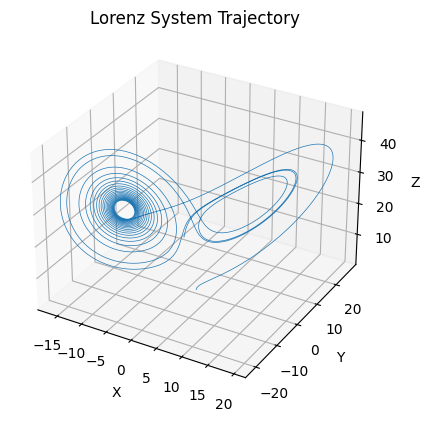

In [52]:
# Plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=.5)
ax.set_title("Lorenz System Trajectory")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()